<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Unsupervised Machine Learning - Final Assignment</font></h1>


In this assignment, we'll employ unsupervised techniques to classify our data. We'll then dive into linear regression to investigate whether our predictions are more accurate when applied to the entire dataset or when broken down into groups derived from the classification process.

## Install and import required libraries

In [1]:
!pip install gower

In [2]:
#suppres warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import normaltest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from gower import gower_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

## Importing the Dataset


We will use E-shop clothing dataset* that contains information on clickstream from online store offering clothing for pregnant women. Data are from five months of 2008 and include, among others, product category, location of the photo on the page, country of origin of the IP address and product price in US dollars.

In [4]:
data = pd.read_csv('e_shop_clothing.csv', sep=';')
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [5]:
data.shape

(165474, 14)

In [6]:
#Random sample 10000 observations from dataset

df = data.sample(n=10000, random_state=42).reset_index(drop=True)

For simplicity, we will use 10,000 random observations.

# 1. About the Data


In this section, we'll perform exploratory data analysis and feature engineering

In [7]:
print(data.dtypes)

year                        int64
month                       int64
day                         int64
order                       int64
country                     int64
session ID                  int64
page 1 (main category)      int64
page 2 (clothing model)    object
colour                      int64
location                    int64
model photography           int64
price                       int64
price 2                     int64
page                        int64
dtype: object


In [8]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2008.0,5.599600,14.417000,9.790100,27.064500,12111.922000,2.397000,6.238700,3.241400,1.257400,43.902400,1.48930,1.707900
std,0.0,1.337183,8.840833,13.667974,6.988306,7022.021845,1.149401,4.207481,1.705701,0.437223,12.669938,0.49991,0.977688
min,2008.0,4.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.00000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,6033.750000,1.000000,3.000000,2.000000,1.000000,33.000000,1.00000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11959.000000,2.000000,5.000000,3.000000,1.000000,43.000000,1.00000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18278.750000,3.000000,9.000000,5.000000,2.000000,52.000000,2.00000,2.000000
max,2008.0,8.000000,31.000000,193.000000,47.000000,24023.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.00000,5.000000


In [9]:
data.isnull().sum() #no null values

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

In [10]:
#checking for duplicates

duplicate = df[df.duplicated()]
duplicate   #no duplicates

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page


In [11]:
#remove year and session ID columns

df = df.drop(columns=['year', 'session ID', 'page 2 (clothing model)'])

Based on our observation, it appears that our dataset is quite clean. There are no null values or duplicates to worry about. Most of the variables are numerical, except for the clothing model, which is stored as a string.

To streamline our analysis and focus on the most informative variables, we have decided to remove the "year," "session id," and "clothing model" columns from the dataset. These columns do not contribute significant information to our analysis, so removing them will help simplify our data and make it more concise for further exploration.

In [12]:
#number of unique values per column

unique_counts = df.nunique()
print(unique_counts)

month                       5
day                        31
order                     124
country                    33
page 1 (main category)      4
colour                     14
location                    6
model photography           2
price                      20
price 2                     2
page                        5
dtype: int64


In [13]:
#distribution of categorical values

categorical_columns = ['month','country','page 1 (main category)','colour',
                  'location','model photography','price 2','page']

for column in categorical_columns:
    print(f"Value counts for '{column}':")
    print(df[column].value_counts())
    print()

Value counts for 'month':
4    2883
5    2184
7    2126
6    1897
8     910
Name: month, dtype: int64

Value counts for 'country':
29    8135
9     1026
24     251
46     159
44      68
16      68
21      65
34      49
41      43
42      13
3       12
27      12
12      11
15      10
22       9
10       8
28       7
37       7
31       7
11       6
38       6
25       5
23       4
39       4
43       4
32       3
14       2
19       1
6        1
40       1
36       1
35       1
47       1
Name: country, dtype: int64

Value counts for 'page 1 (main category)':
1    3032
4    2376
2    2342
3    2250
Name: page 1 (main category), dtype: int64

Value counts for 'colour':
3     1789
2     1733
6     1096
4      998
14     951
9      833
12     523
1      464
7      437
13     374
11     314
10     225
8      165
5       98
Name: colour, dtype: int64

Value counts for 'location':
2    2074
1    2068
4    1649
5    1623
3    1343
6    1243
Name: location, dtype: int64

Value counts for 'mode

In our dataset categorical values are encoded using integers. However, it's important to note that there is no inherent hierarchy or order among these integer-encoded values. Therefore, we have made the decision to treat these variables as categorical rather than numerical.

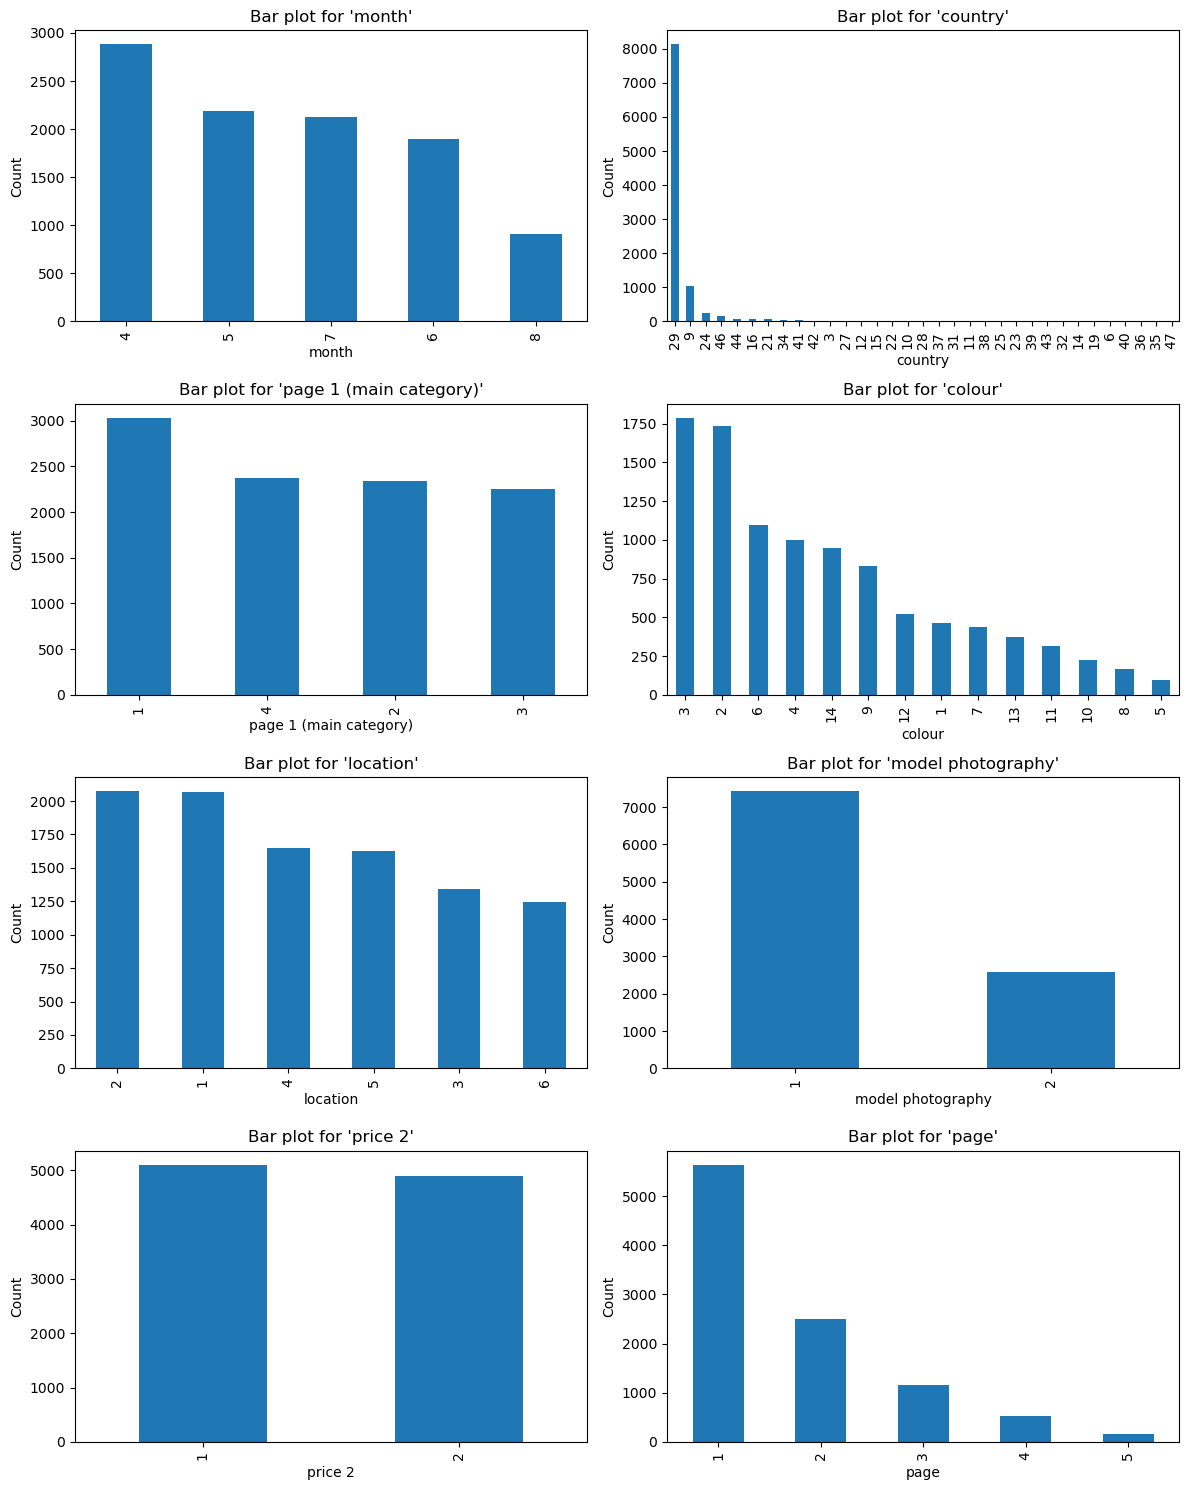

In [14]:
#categorical data distribution

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2

    # Create a bar plot in the appropriate subplot
    df[column].value_counts().plot.bar(ax=axes[row, col])
    axes[row, col].set_title(f"Bar plot for '{column}'")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

From the graphs above, it is evident that the distribution of categorical variables in our dataset is highly skewed or, in some cases, close to uniform.

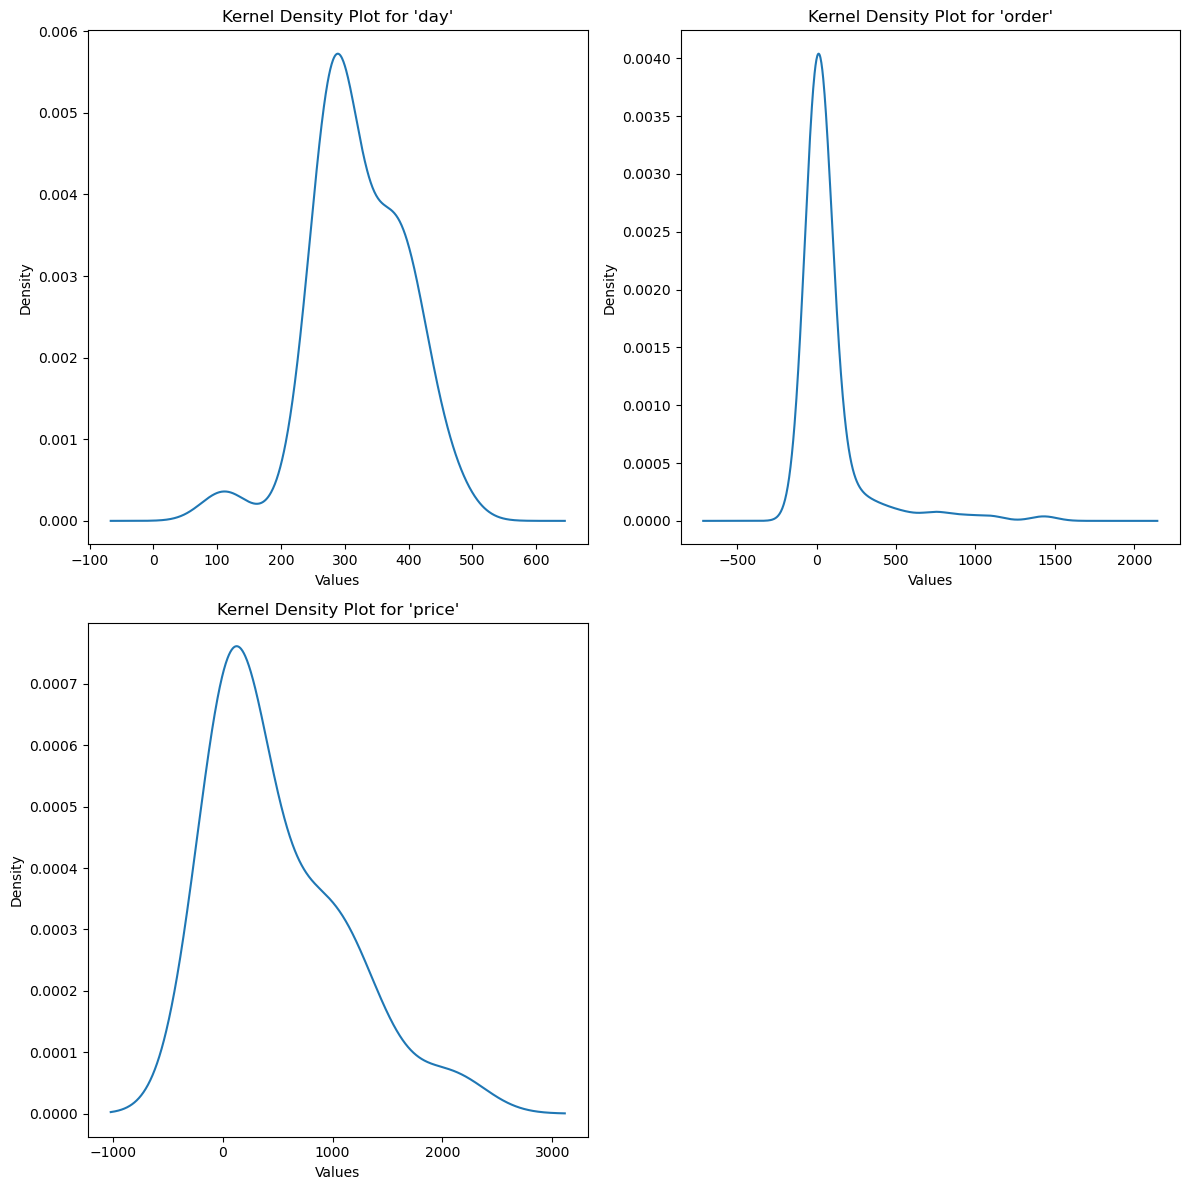

In [15]:
#distribution of numerical variables

numerical_columns = ['day','order','price']

# Set up the grid layout
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate over the numerical columns and plot kde plots
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    
    # Create a kde plot
    df[column].value_counts().plot.kde(ax=axes[row, col])
    axes[row, col].set_title(f"Kernel Density Plot for '{column}'")
    axes[row, col].set_xlabel("Values")
    axes[row, col].set_ylabel("Density")

# Remove empty subplots if the number of categorical columns is less than 3x4
if len(numerical_columns) < num_rows * num_cols:
    for i in range(len(numerical_columns), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()  

In [16]:
df = df.drop('country', axis=1)

After careful consideration, we have decided to drop the "country" variable from our dataset. The reason behind this decision is that the variable contains a large number of unique values, which would result in too many categories if included in our classification task.

In [17]:
#One-hot-encoding of categorical variables

df = pd.get_dummies(df, columns=['month', 'page 1 (main category)', 'colour', 'location',
                                'model photography','price 2'], drop_first=True)

In [18]:
#Skewness analysis

numerical_columns = df.select_dtypes(include=['float', 'int']).columns

skew_vals = data[numerical_columns].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'}))

skew_cols

,Skew
order,4.468848
page,1.375776
price,0.522185
day,0.175620


In [19]:
log_transform = np.log1p(data['order'])
normaltest(log_transform)

NormaltestResult(statistic=6349.89335349794, pvalue=0.0)

In [20]:
log_transform = np.log1p(data['page'])
normaltest(log_transform)

NormaltestResult(statistic=18371.122660002115, pvalue=0.0)

In [21]:
data['order'] = np.log(data['order'])
data['page'] = np.log(data['page'])

Based on the analysis of skewness, it has been determined that the variables "order" and "page" in our dataset exhibit a non-normal distribution. In order to address this issue and make the distributions more symmetric, we have decided to perform a log transformation on these variables.

In [22]:
#Use of StandardScaler to scale the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)

In [23]:
df[numerical_columns] = scaled_data

In [24]:
df.head(10)

,day,order,price,page,month_5,month_6,month_7,month_8,page 1 (main category)_2,page 1 (main category)_3,...,colour_12,colour_13,colour_14,location_2,location_3,location_4,location_5,location_6,model photography_2,price 2_2
0,0.857768,-0.423647,-0.860537,1.321654,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0.518416,-0.643149,-0.860537,-0.724092,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
2,-0.386521,0.015358,-1.255191,0.298781,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,1.536471,-0.496814,1.033806,0.298781,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1.310236,-0.643149,-0.071227,-0.724092,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,-0.725873,-0.569981,-0.071227,-0.724092,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0.179064,1.039701,-0.465882,1.321654,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1.310236,-0.643149,-0.465882,0.298781,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
8,1.649588,-0.643149,-1.255191,-0.724092,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1.875822,-0.643149,3.007079,-0.724092,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
#Apply PCA for dimensionality reduction

pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.95)[0][0] + 1

19

19 components explain over 95% of variability.

In [27]:
pca = PCA(n_components=19)
reduced_data = pca.fit(df).transform(df)

In [28]:
pca_data = pd.DataFrame(reduced_data, columns=[f'Component {i}' for i in range(reduced_data.shape[1])]).head()
pca_data.head(10)

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18
0,1.439954,-0.835673,0.658487,-0.961068,0.630007,0.439382,0.144634,-0.115995,-0.205541,-0.046937,0.465806,0.573314,-0.469220,-0.024950,-0.459823,0.117850,-0.249752,-0.600456,-0.258671
1,0.048662,-1.486391,-0.047263,0.257257,-0.449750,0.221508,0.448507,-0.832400,-0.520213,-0.571603,0.142660,0.108164,0.010160,0.385084,0.410664,-0.301023,-0.597807,0.341872,0.524883
2,1.318377,-0.680427,-0.720025,-0.094388,0.439984,-0.205284,-0.039222,-0.695615,0.452856,-0.179847,-0.278473,0.485085,0.309770,0.013674,0.052771,0.314701,0.639366,-0.151447,0.371350
3,-0.890584,0.050532,1.746972,-0.610322,-0.129115,0.070458,-0.555982,-0.310337,0.712519,0.020213,-0.648800,-0.093780,-0.069370,-0.116972,-0.123163,0.322855,-0.164290,-0.140556,0.079405
4,-0.706418,-1.287224,0.882731,0.367694,-0.052162,-0.348157,-0.705245,-0.352667,-0.657968,-0.193267,0.431541,-0.090928,-0.088836,0.292625,0.077264,-0.022863,-0.001131,0.018498,-0.134780


Given that the PCA resulted in a reduced dataset of only five rows, we have made the decision to proceed with the original dataset in its original form and after applying standard scaling, without applying dimensionality reduction. This approach allows us to retain the complete set of features and better capture the inherent characteristics of the data.

# 2. Objectives


In this analysis, we have employed three different classification models to classify the data. Following the classification phase, we have proceeded with a linear regression analysis on both the original dataset and individual groups derived from each classification model. The objective of this analysis is to compare the performance and predictive capabilities of the models on the overall dataset and the separate groups.



# 3. Clustering Models


### K Means Clusstering

In [29]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

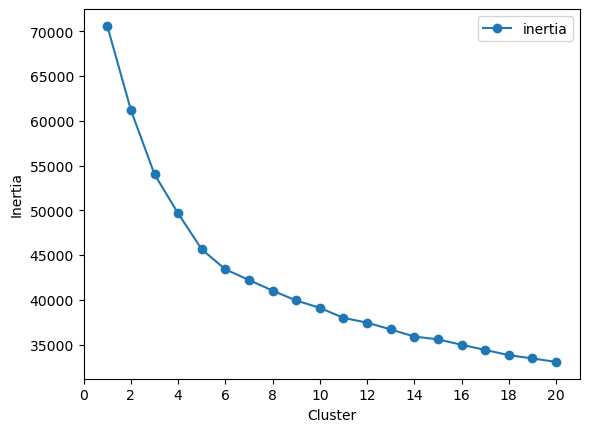

In [30]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [31]:
km_model = KMeans(n_clusters=6, random_state=123)
km_model = km_model.fit(df)

In [32]:
km_labels = km_model.labels_

In our analysis, we have plotted the graph of the number of clusters against the inertia values.By examining the graph, we observe an elbow point at 6 clusters, indicating decrease in inertia beyond this point.Based on this observation, we have decided to develop a K-means clustering model using 6 clusters. We proceed to fit the model the original and scaled dataframe.

### DBSCAN Clustering

In [33]:
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

best_score = -1  # Initialize the best score
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)
        score = metrics.silhouette_score(df, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

In [34]:
dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_model.fit(df)
dbscan_labels = dbscan_model.fit_predict(df)

In [35]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of clusters: {n_clusters}")

Estimated number of clusters: 50


We have used the DBSCAN clustering algorithm, which requires setting two important parameters: epsilon and min_samples (minimum number of data points required to form a dense region or neighborhood). To determine the best values for these parameters, we performed an evaluation using various combinations of epsilon and min_samples. After finding the best parameter values, we developed a DBSCAN model using these specific parameters. This model was then fitted on our dataset, and upon evaluation, we found that the best model resulted in 50 clusters.

### Agglomerative Clustering

In [36]:
distance_matrix = gower_matrix(df)

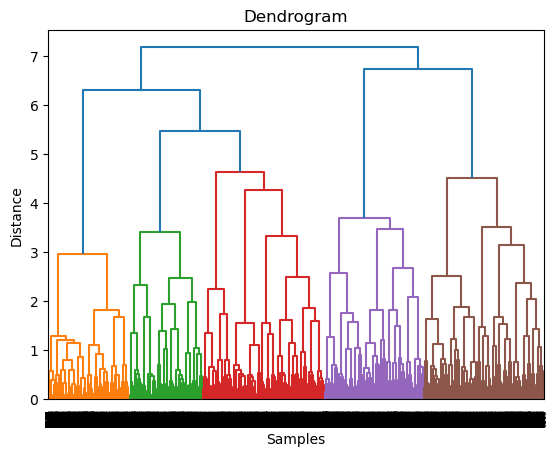

In [37]:
condensed_distance = squareform(distance_matrix)
linkage_matrix = linkage(condensed_distance, method='ward')

dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [38]:
merge_distances = linkage_matrix[:, 2]
differences = np.diff(merge_distances)

# Identify the threshold
threshold_index = np.argmax(differences) + 1
threshold = merge_distances[threshold_index]
print("Selected Threshold:", threshold)

Selected Threshold: 6.296974221097703


In [39]:
n_clusters = 6
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
agg_labels = clustering.fit_predict(distance_matrix)

We utilized agglomerative clustering with the Gower distance metric. The Gower distance is a measure used to calculate the dissimilarity between observations in datasets that contain both numerical and categorical variables. It takes into account the different data types and their respective distances.

To determine the best number of clusters for our agglomerative clustering model, we initially plotted a dendrogram. However, due to the complexity and possibly large size of the dataset, the dendrogram might have been unreadable or difficult to interpret. As an alternative approach, we decided to set a specific threshold to cut the dendrogram and determine the number of clusters and we found that setting the threshold to achieve 6 clusters yielded the best results for our analysis. Once we determined the optimal number of clusters, we proceeded to fit the agglomerative clustering model with the specified number of clusters.

### Linear Regression

In this section, we will conduct simple linear regression on the original dataset and the individual groups obtained from the previous three clustering models. To evaluate the performance of the linear regression models, we will calculate two metrics: Mean Absolute Error (MAE) and R-squared (R2). 

In [40]:
X = df.drop('price', axis=1)
y = df['price']

In [41]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
predictions = lm.predict(X)

In [43]:
mae = mean_absolute_error(y, predictions)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y, predictions)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.30046867013438333
R-squared (R²) Score: 0.8385699830489415


In [44]:
labels = {'km_labels': km_labels,
          'dbscan_labels': dbscan_labels,
          'agg_labels': agg_labels}

df = df.assign(**labels)

In [45]:
def filter_dataframe(df, column, values):
    filtered_df = df[df[column].isin(values)]
    return filtered_df

In [46]:
def group_regression(df, column):
    
    mae_values = []
    r2_score_values = []
    
    for i in df[column].unique():
        filtered_df = filter_dataframe(df, column, [i])
        X = filtered_df.drop('price', axis=1)
        y = filtered_df['price']
        lm = LinearRegression()
        lm.fit(X,y)
        predictions = lm.predict(X)
        mae = mean_absolute_error(y, predictions)
        r2 = r2_score(y, predictions)
        mae_values.append(mae)
        r2_score_values.append(r2)
        
    print('average mae: ',sum(mae_values)/len(mae_values))
    print('average r2: ',sum(r2_score_values)/len(r2_score_values))

In [47]:
group_regression(df, 'km_labels')

average mae:  0.2543146511436738
average r2:  0.7154373988894486


In [48]:
group_regression(df, 'dbscan_labels')

average mae:  0.021011094957094058
average r2:  0.4060688542056474


In [49]:
group_regression(df, 'agg_labels')

average mae:  0.17856264783322248
average r2:  0.8840614136508312


# 4. Insights and key findings


In [50]:
#Compare models

comp_data = {'MAE' : [0.30,0.25,0.02,0.18],
            'R2' : [0.84,0.72,0.41,0.88]}
row_names = ['simple_reg', 'k_means', 'DBSCAN', 'agg_clust']

comp_table = pd.DataFrame(comp_data, index=row_names)

In [51]:
comp_table

,MAE,R2
simple_reg,0.30,0.84
k_means,0.25,0.72
DBSCAN,0.02,0.41
agg_clust,0.18,0.88


Based on the comparative table, it is evident that the agglomerative clustering model achieves the lowest MAE and the highest R2 score among the evaluated models. The DBSCAN model exhibits a low MAE and a low R2 score which means that the model's predictions are not accurate and the predictor variables have limited ability to explain the variance in the target variable. The regression on individual groups derived from k-means does not demonstrate a significant improvement over the simple regression performed on the entire dataset.

In summary, the agglomerative clustering model emerges as the most favorable choice based on the comparative evaluation, exhibiting superior performance in terms of MAE and R2 compared to other models.

# 5. Next Steps


In our analysis, we utilize agglomerative clustering to group data into distinct clusters. This clustering allows us to predict prices for specific data categories based on various features such as product category, color, model, and the page and position of the item on the web page. These predictions hold valuable insights for digital advertising purposes.

*£apczyñski M., Bia³ow¹s S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - 
Comparison of Consumer Buying Behaviours in Poland and Other European Countries, 
“Studia Ekonomiczne”, nr 151, “La société de l'information : perspective européenne et 
globale : les usages et les risques d'Internet pour les citoyens et les consommateurs”, p. 144-
153.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
